<a href="https://colab.research.google.com/github/charan-debug/MDSC-106-Data-Visualization/blob/TASK-1/TASK1_TELECOM_CUSTOMER_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Understanding & Exploration:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.


In [11]:
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [49]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print (df1.shape)

(7043, 10)


In [6]:
print (df2.shape)

(7043, 12)


In [7]:
df1.isnull().sum()

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
dtype: int64

In [8]:
df2.isnull().sum()

customerID          0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df1.describe()

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [10]:
df2.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [48]:
merged_df = df1.merge(df2, on='customerID')

# Now merged_df contains all columns from df1 and df2 based on the 'customerID' match


In [31]:
merged_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
merged_df.shape

(7043, 21)

In [47]:
merged_df.isnull().sum()#there is no null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

D. Verify if all the columns are incorporated in the merged DataFrame by using simple
comparison Operator in Python.

Using sets will allows us to perform set operations to quickly verify if all columns from both DataFrames are present in the merged DataFrame, and if not, identify which columns are missing.

In [54]:
import pandas as pd

# Define the column lists for df1 and df2
df1_columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
               'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']

df2_columns = ['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
               'MonthlyCharges', 'TotalCharges', 'Churn']

# Get the column list from the merged DataFrame
merged_columns = merged_df.columns.tolist()

# Convert the lists to sets for comparison
df1_set = set(df1_columns)
df2_set = set(df2_columns)
merged_set = set(merged_columns)

# Compare the sets
if df1_set.union(df2_set) == merged_set:
    print("All columns from df1 and df2 are present in the merged DataFrame.")
else:
    # Find columns not incorporated in the merged DataFrame
    not_incorporated_columns = df1_set.union(df2_set) - merged_set
    print("Columns are not present in the merged DataFrame:")
    print(not_incorporated_columns)


All columns from df1 and df2 are present in the merged DataFrame.


# 2. Data Cleaning & Analysis:



 **A.Impute missing/unexpected values in the DataFrame.**


In [55]:
import pandas as pd

missing_values_df1 = df1.isna()  # or df1.isnull()


missing_values_df2 = df2.isna()  # or df2.isnull()

missing_count_df1 = missing_values_df1.sum()
missing_count_df2 = missing_values_df2.sum()

print("Missing values in df1:")
print(missing_count_df1)

print("Missing values in df2:")
print(missing_count_df2)


Missing values in df1:
customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
dtype: int64
Missing values in df2:
customerID          0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


There are no missing values.

In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
import pandas as pd

merged_df['TotalCharges'] = pd.to_numeric(merged_df['TotalCharges'], errors='coerce')

# Convert other continuous columns to float if needed
continuous_columns = ['MonthlyCharges']  # Add other continuous column names here
merged_df[continuous_columns] = merged_df[continuous_columns].astype(float)

It appears that the 'TotalCharges' column is currently of type 'object', even though it should contain continuous values.
Converting it into float.


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


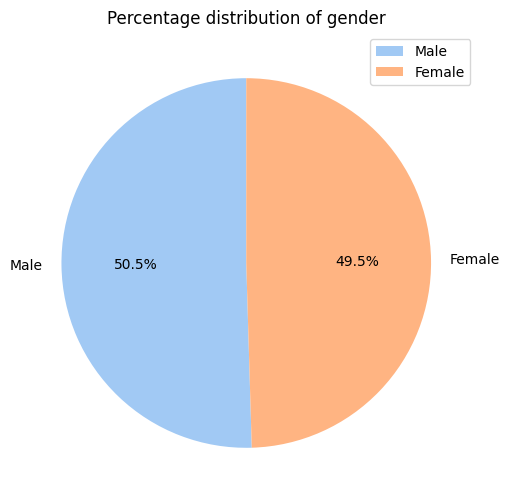

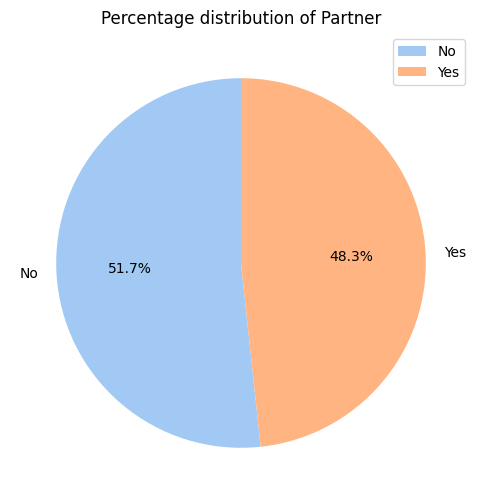

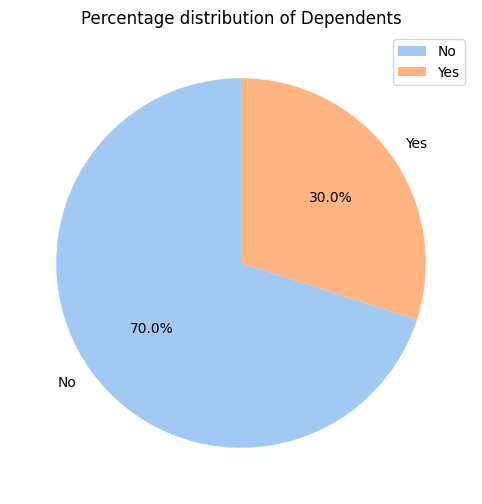

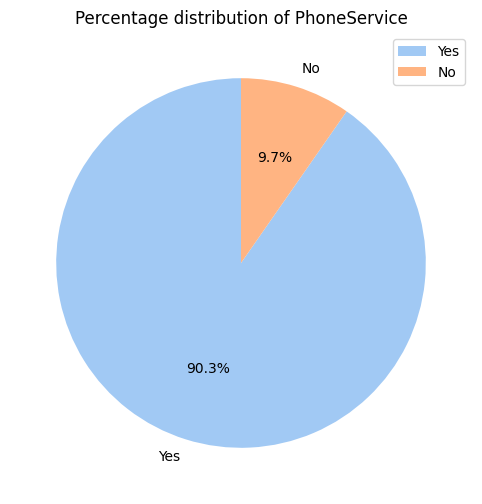

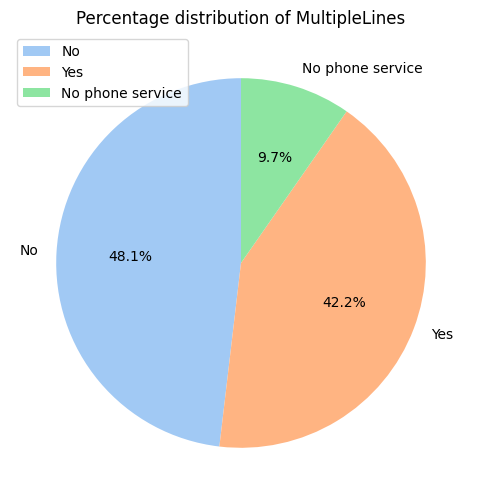

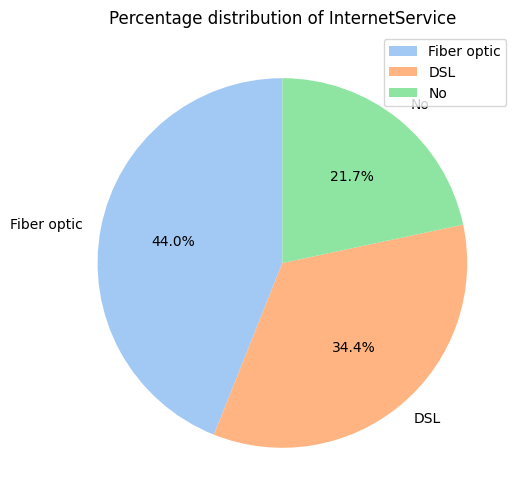

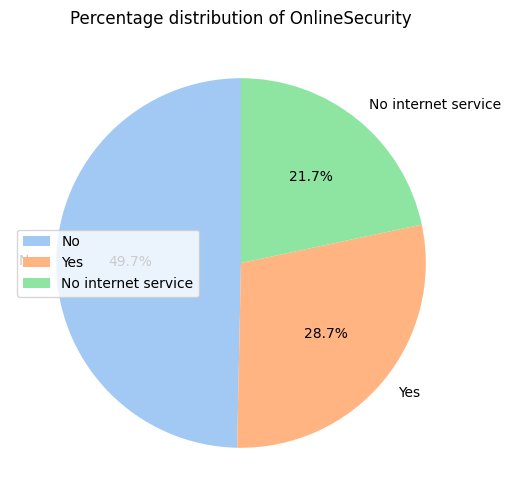

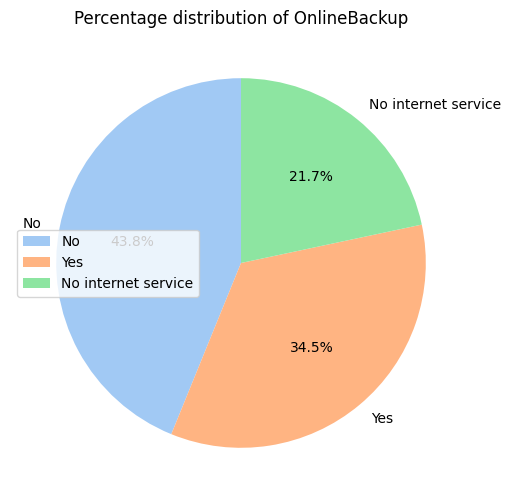

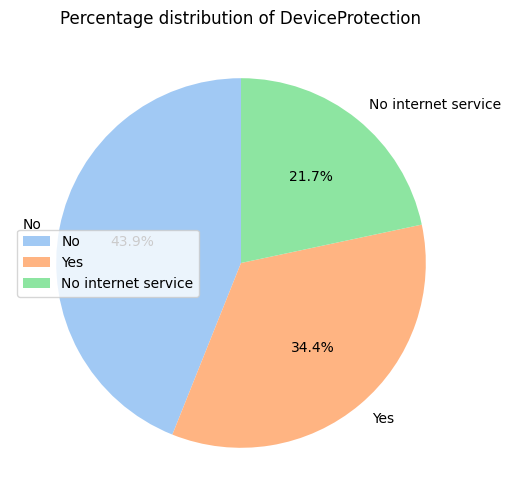

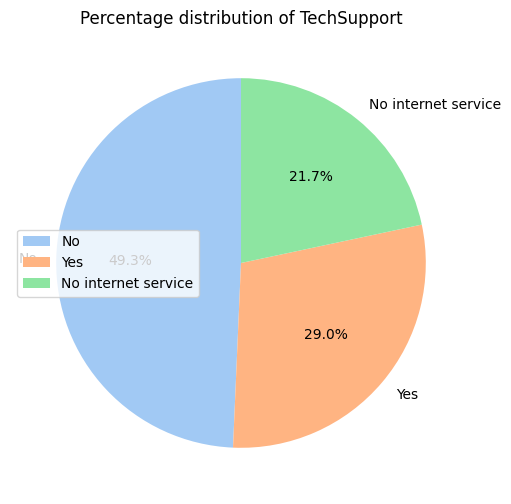

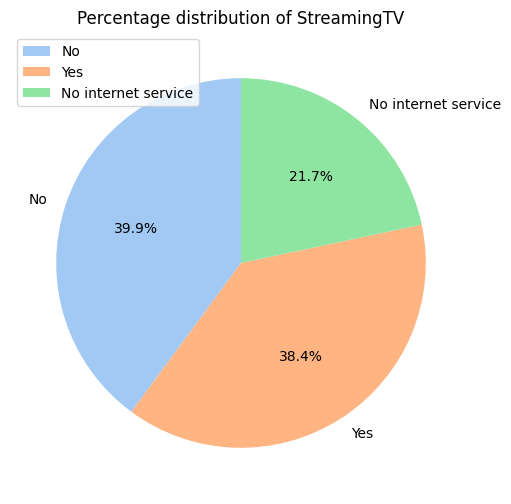

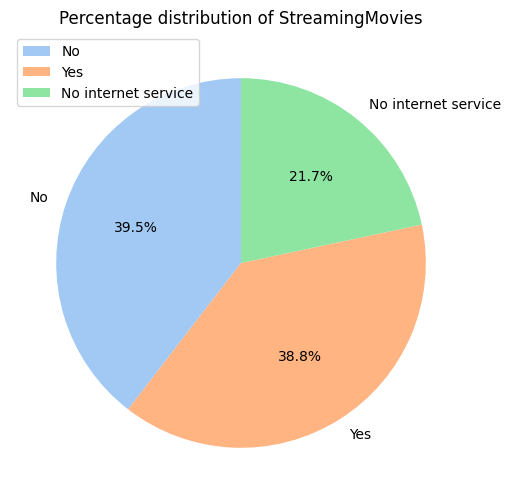

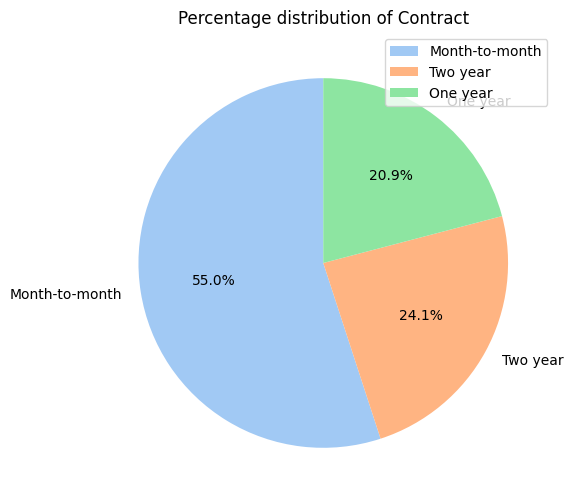

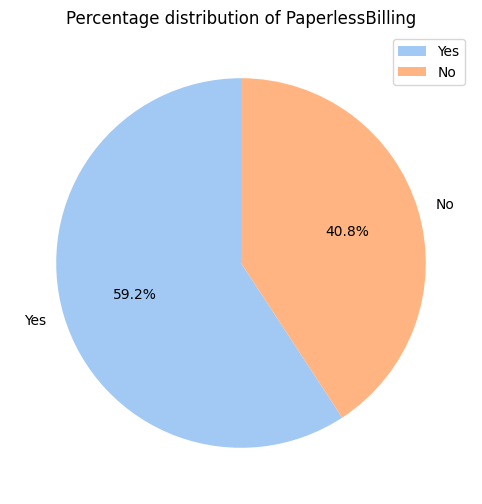

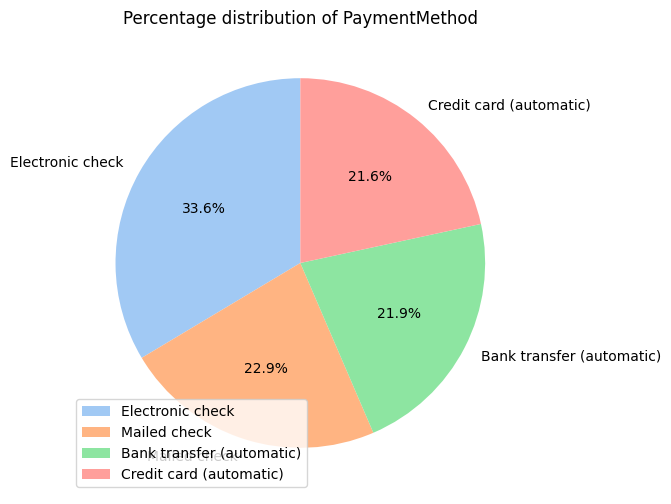

ValueError: ignored

<Figure size 800x600 with 1 Axes>

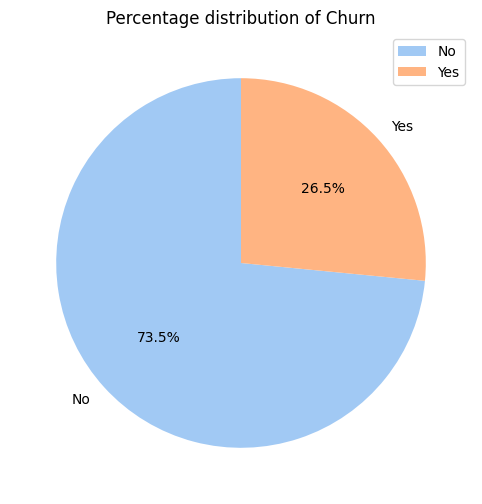

In [50]:
def create_pie_charts(data_frame):
    categorical_columns = data_frame.select_dtypes(include=['object']).columns

    for col in categorical_columns:
        if col != 'customerID':
            counts = data_frame[col].value_counts()
            labels = counts.index
            sizes = counts.values
            total_count = sum(sizes)
            percentages = [(size / total_count) * 100 for size in sizes]

            plt.figure(figsize=(8, 6))
            sns.set_palette("pastel")
            plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90)
            plt.title(f'Percentage distribution of {col}')
            plt.legend(labels, loc="best")
            plt.show()


create_pie_charts(merged_df)
